## 1. Load the Iris Dataset and Basic Exploration


Number of data points: 150
Column data types:
Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object
Column names: Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
Number of flower species: 3


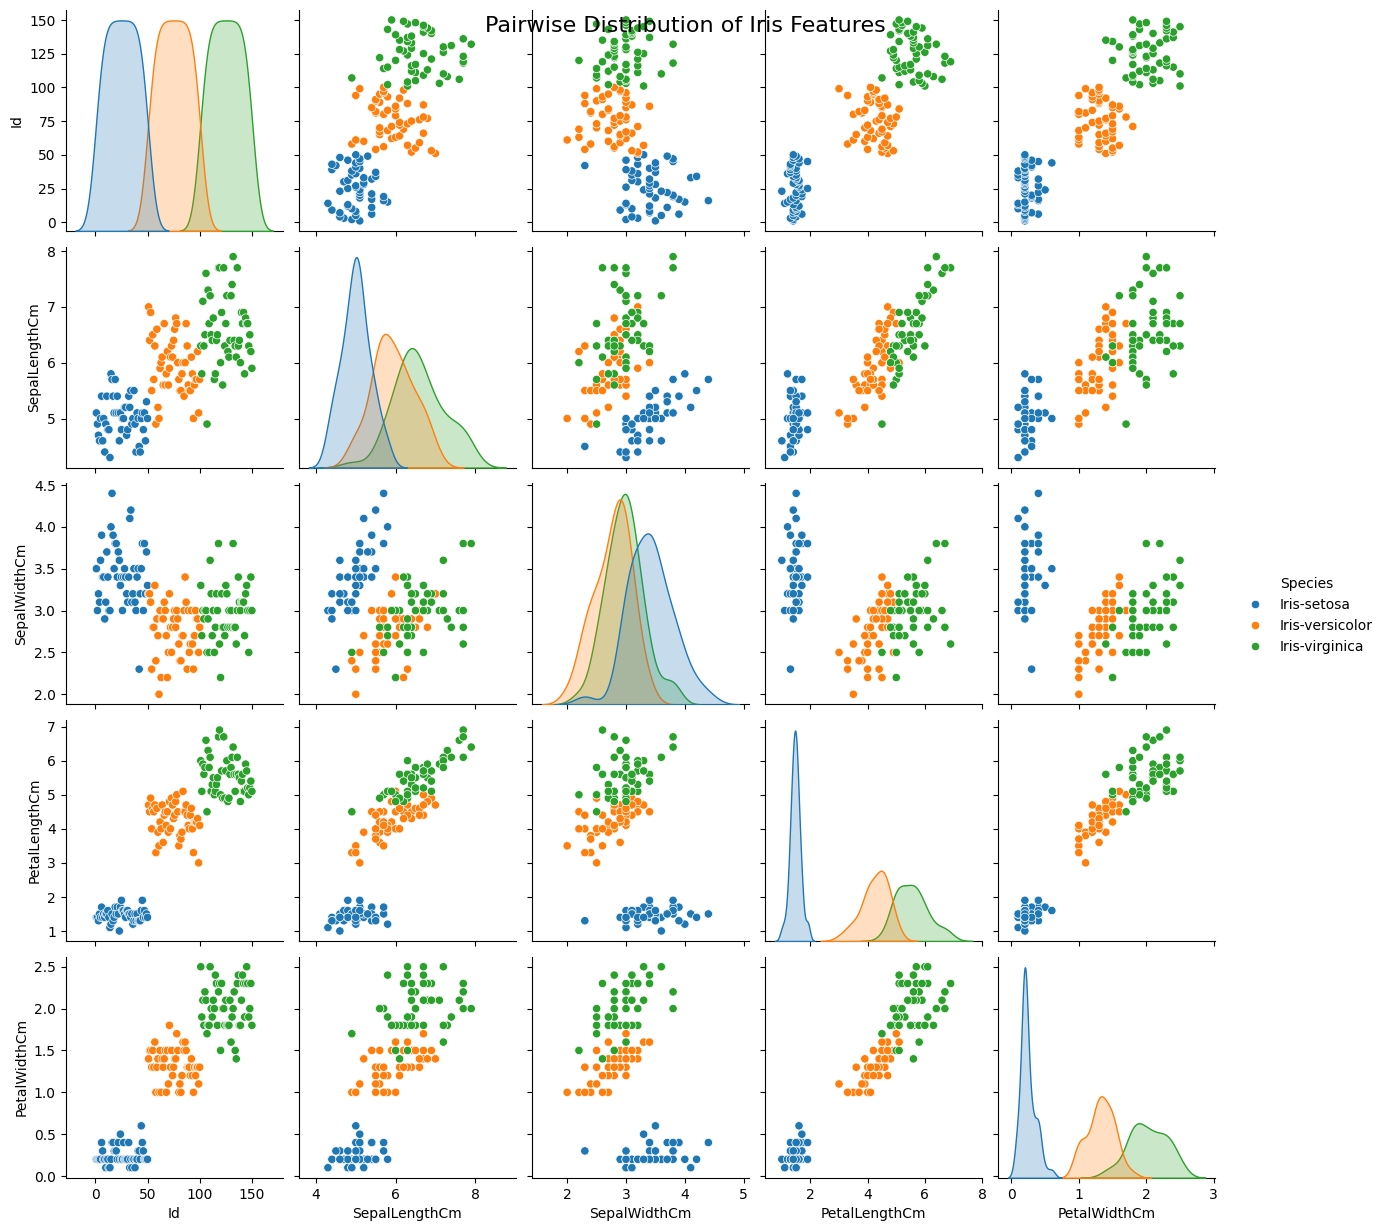

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the iris dataset
iris = pd.read_csv('static_files/Iris.csv')

data_points = iris.shape[0]  # Number of data points
column_types = iris.dtypes  # Data types of the columns
column_names = iris.columns  # Column names
species_count = iris['Species'].nunique()  # Number of unique species

print(f"Number of data points: {data_points}")
print(f"Column data types:\n{column_types}")
print(f"Column names: {column_names}")
print(f"Number of flower species: {species_count}")
sns.pairplot(iris, hue='Species', height=2.5)
plt.suptitle('Pairwise Distribution of Iris Features', fontsize=16)
plt.show()


## 2. Correcting Errors with Verification

Original 35th row: Id                        35
SepalLengthCm            4.9
SepalWidthCm             3.1
PetalLengthCm            1.5
PetalWidthCm             0.1
Species          Iris-setosa
Name: 34, dtype: object
Original 38th row: Id                        38
SepalLengthCm            4.9
SepalWidthCm             3.1
PetalLengthCm            1.5
PetalWidthCm             0.1
Species          Iris-setosa
Name: 37, dtype: object

Corrected 35th row: Id                        35
SepalLengthCm            4.9
SepalWidthCm             3.1
PetalLengthCm            1.5
PetalWidthCm             0.2
Species          Iris-setosa
Name: 34, dtype: object
Corrected 38th row: Id                        38
SepalLengthCm            4.9
SepalWidthCm             3.6
PetalLengthCm            1.4
PetalWidthCm             0.1
Species          Iris-setosa
Name: 37, dtype: object


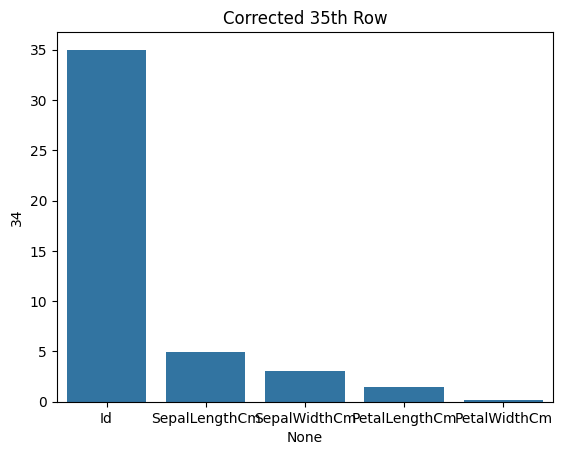

In [40]:
print("Original 35th row:", iris.iloc[34])
print("Original 38th row:", iris.iloc[37])
iris.loc[34] = [iris.iloc[34, 0], 4.9, 3.1, 1.5, 0.2, 'Iris-setosa']
iris.loc[37] = [iris.iloc[37, 0], 4.9, 3.6, 1.4, 0.1, 'Iris-setosa']
print("\nCorrected 35th row:", iris.iloc[34])
print("Corrected 38th row:", iris.iloc[37])
sns.barplot(x=iris.columns[:-1], y=iris.iloc[34, :-1])
plt.title("Corrected 35th Row")
plt.show()

## 3. Feature Engineering with Insights

In [41]:
iris['Petal Ratio'] = iris['PetalLengthCm'] / iris['PetalWidthCm']
iris['Sepal Ratio'] = iris['SepalLengthCm'] / iris['SepalLengthCm']
iris['Area Ratio'] = (iris['PetalLengthCm'] * iris['PetalWidthCm']) / (iris['SepalLengthCm'] * iris['SepalWidthCm'])
iris.to_csv('static_files/iris_corrected_with_area_ratio.csv', index=False)

## 4. Advanced Correlation Analysis

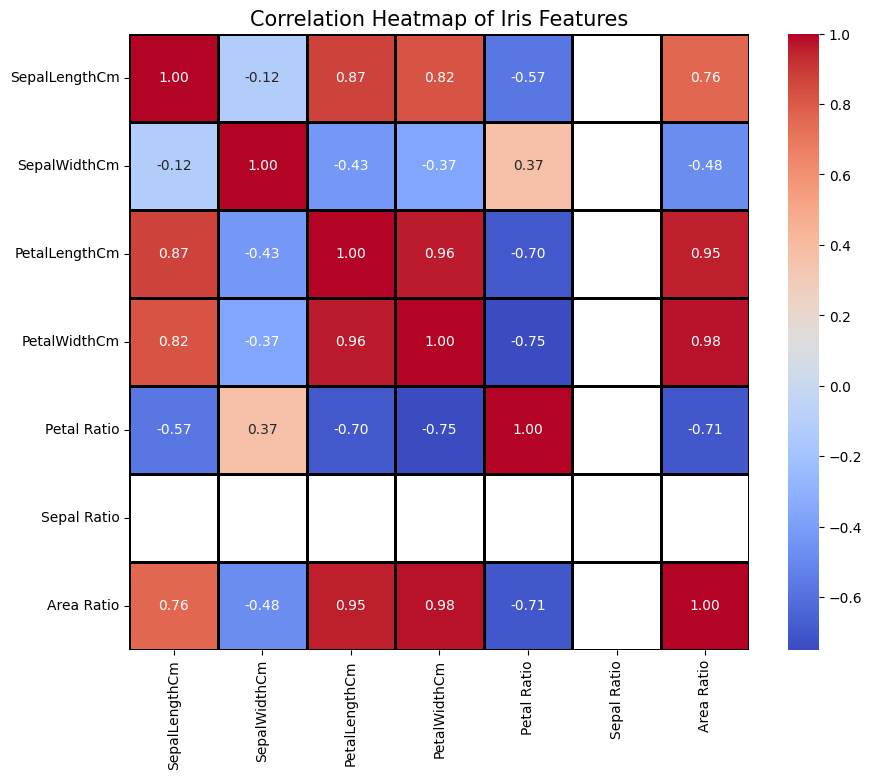


Highest positive correlation:
SepalLengthCm  SepalLengthCm    1.000000
Area Ratio     PetalWidthCm     0.975224
dtype: float64

Highest negative correlation:
PetalWidthCm  Petal Ratio   -0.748906
Petal Ratio   Area Ratio    -0.707609
dtype: float64


In [42]:
# Dropping the non-numeric columns
iris_numeric = iris.drop(columns=['Species', 'Id'])
correlation_matrix = iris_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black')
plt.title("Correlation Heatmap of Iris Features", fontsize=15)
plt.show()
positive_corr = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()
negative_corr = correlation_matrix.unstack().sort_values(ascending=True).drop_duplicates()
print("\nHighest positive correlation:")
print(positive_corr.head(2))

print("\nHighest negative correlation:")
print(negative_corr.head(2))


## 5. Interactive Scatter Plot with Regression Line

In [43]:
import plotly.express as px
fig = px.scatter(iris, x='Sepal Ratio', y='Petal Ratio', color='Species', trendline="ols",
                 title="Sepal Ratio vs Petal Ratio with Regression Lines",
                 labels={'Sepal Ratio': 'Sepal Ratio', 'Petal Ratio': 'Petal Ratio'},
                 opacity=0.8)
fig.update_layout(
    title="Sepal Ratio vs Petal Ratio with Regression Lines",
    title_x=0.5,
    title_font=dict(size=20, family='Verdana', color='blue'),
    xaxis_title='Sepal Ratio',
    yaxis_title='Petal Ratio',
    xaxis=dict(showgrid=True, zeroline=False),
    yaxis=dict(showgrid=True, zeroline=False),
    plot_bgcolor='rgba(255, 255, 255, 0.7)',  # Light background
    paper_bgcolor='rgba(255, 255, 255, 0.9)',  # Paper background
    font=dict(family="Arial", size=12, color="black")
)
fig.update_traces(marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')),
                  hoverinfo="text", hovertemplate="<b>Species:</b> %{text}<br><b>Sepal Ratio:</b> %{x}<br><b>Petal Ratio:</b> %{y}",
                  text=iris['Species'])
fig.update_layout(legend_title="Flower Species")
fig.write_html("static_files/iris_scatter_with_regression_improved.html")
fig.show()


/usr/local/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



## 6. Advanced Pair Plot with Seaborn

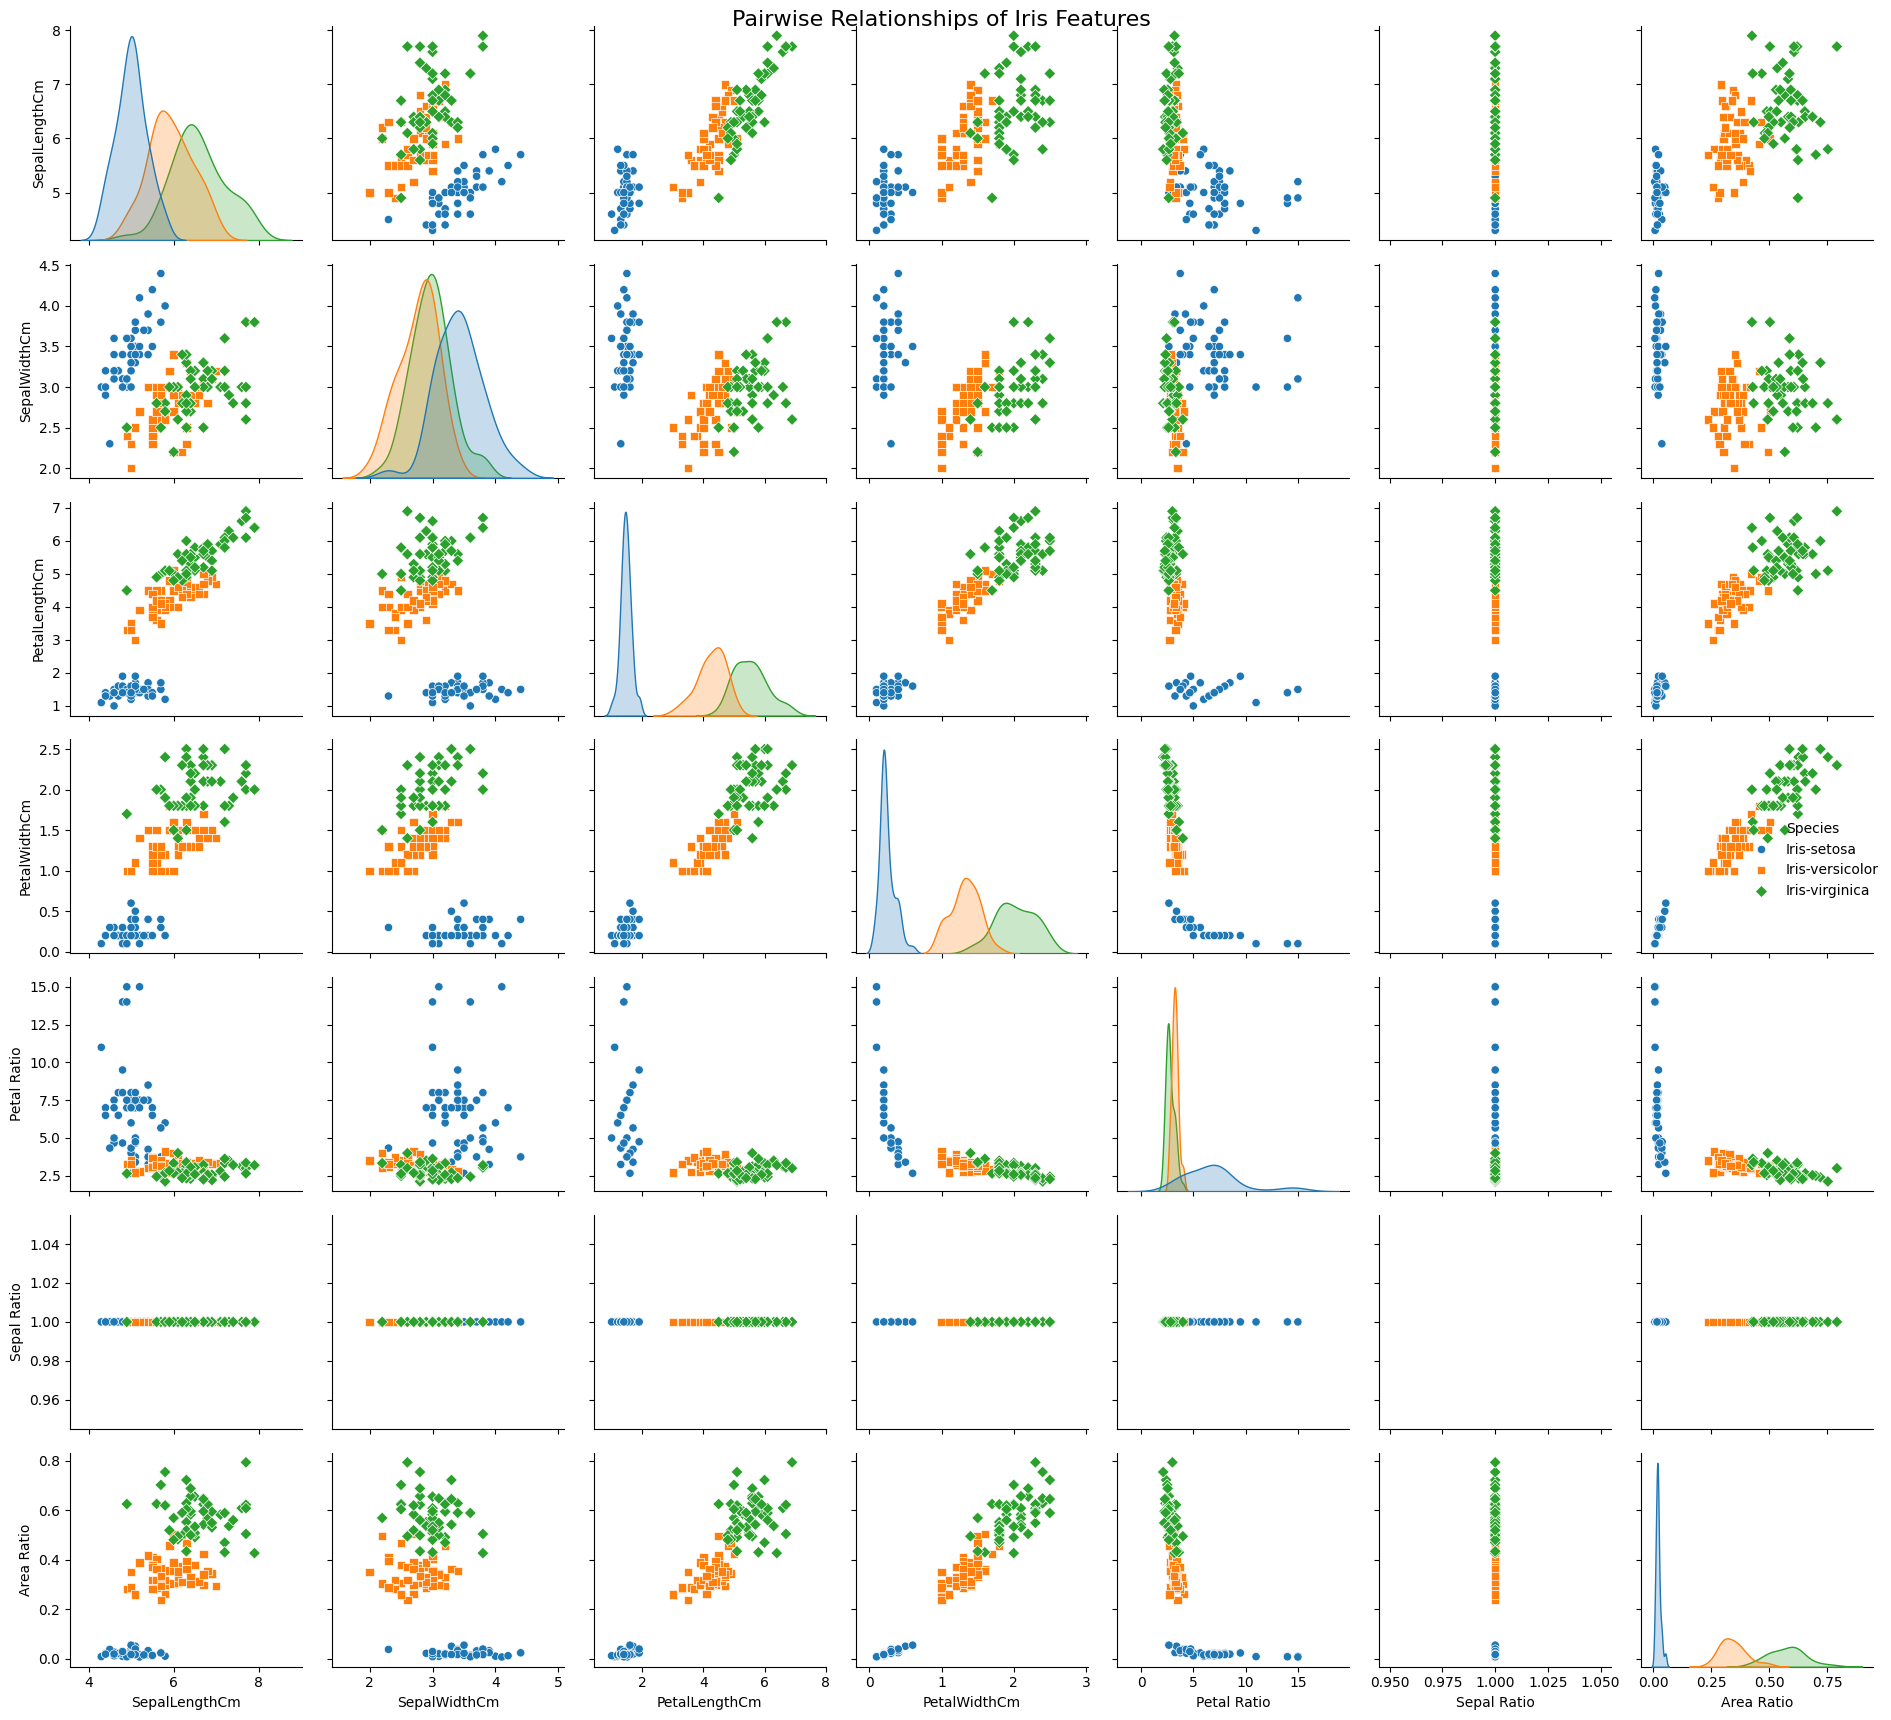

In [44]:
sns.pairplot(iris, hue='Species', vars=['SepalLengthCm', 'SepalWidthCm', 
                                        'PetalLengthCm', 'PetalWidthCm', 
                                        'Petal Ratio', 'Sepal Ratio', 'Area Ratio'], 
             diag_kind='kde', height=2.5, markers=["o", "s", "D"])

plt.suptitle("Pairwise Relationships of Iris Features", fontsize=16)
plt.tight_layout()
plt.show()